In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import richdem as rd

Leer la Data

In [2]:
filename = './data/02/02.tif'
# filename = './images/non_pre_landsdlide_test_-1.tif'
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
# bands = { gdal_data.GetRasterBand(i + 1).GetDescription(): i for i in range(gdal_data.RasterCount) }
# for band in bands.keys():
#     bands[band] = gdal_data.ReadAsArray().astype(float)[bands[band]]
# data_array = bands['elevation']
data_array = gdal_data.ReadAsArray().astype(float)

In [3]:
ulx, xres, xskew, uly, yskew, yres  = gdal_data.GetGeoTransform()
lrx = ulx + (gdal_data.RasterXSize * xres)
lry = uly + (gdal_data.RasterYSize * yres)
print((ulx, uly), (lrx, lry))
print((ulx + lrx) / 2)
print((uly + lry) / 2)

(-91.44314321385998, 15.63886305510646) (-91.4420615044392, 15.63813835296854)
-91.44260235914959
15.6385007040375


Reemplazar valores faltantes

In [4]:
print(len(data_array[data_array != nodataval]) / (len(data_array[data_array != nodataval]) +
      len(data_array[data_array == nodataval])))
data_array = np.where(data_array == nodataval, np.nan, data_array)
print(data_array.shape)
print(data_array.shape[1] / 200000)

0.6165578816741607
(645, 962)
0.00481


In [5]:
def center_crop(img, new_width=60, new_height=60):        
        # return img
        width = img.shape[1]
        height = img.shape[0]

        if new_width is None:
            new_width = min(width, height)

        if new_height is None:
            new_height = min(width, height)

        left = int(np.ceil((width - new_width) / 2))
        right = width - int(np.floor((width - new_width) / 2))

        top = int(np.ceil((height - new_height) / 2))
        bottom = height - int(np.floor((height - new_height) / 2))

        if len(img.shape) == 2:
            center_cropped_img = img[top:bottom, left:right]
        else:
            center_cropped_img = img[top:bottom, left:right, ...]

        return center_cropped_img

Graficar la data

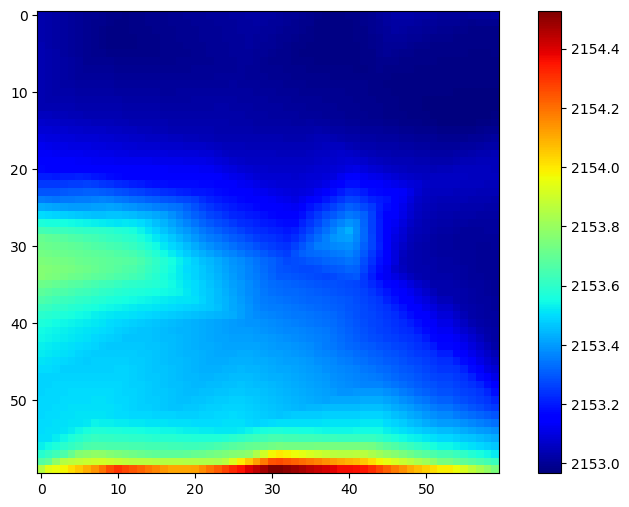

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(center_crop(data_array), cmap='jet', interpolation='none')
plt.colorbar()
plt.show()

Graficar Curvas de nivel

In [7]:
fig = plt.figure(figsize=(10, 6))
min = np.nanmin(center_crop(data_array))
max = np.nanmax(center_crop(data_array))
plt.contour(center_crop(data_array[::-1]), cmap="jet",
            levels=list(range(int(min), int(max), int((max - min) / 10))))
plt.title("Curvas de Nivel")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ValueError: range() arg 3 must not be zero

<Figure size 1000x600 with 0 Axes>

Convertir a rd_array

In [ ]:
rd_array = rd.rdarray(data_array, no_data=np.nan)

Graficar angulo de inclinación (porcentaje)
###### Se calcula la pendiente de una celda focal utilizando una estimación de diferencia central de una superficie ajustada a la celda focal y sus vecinos. La pendiente elegida es la máxima de esta superficie.
###### Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


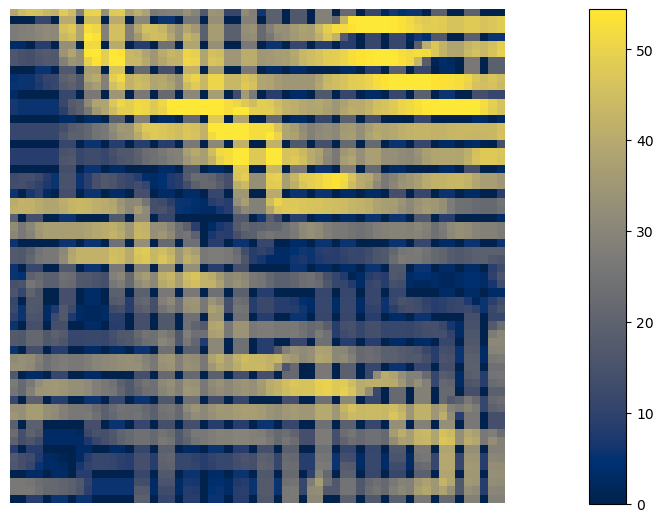

In [ ]:
slope = rd.TerrainAttribute(rd_array, attrib='slope_degrees', zscale=0.1)
rd.rdShow(center_crop(slope), axes=False, cmap='cividis', figsize=(8, 5.5))
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


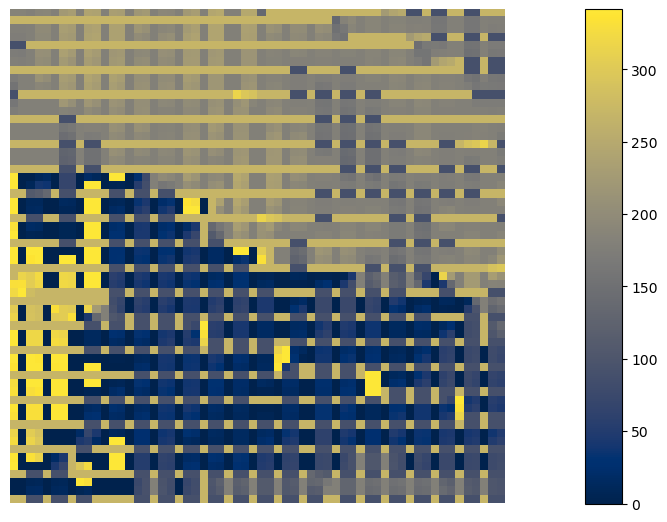

In [ ]:
aspect = rd.TerrainAttribute(rd_array, attrib='aspect', zscale=0.1)
rd.rdShow(center_crop(aspect), axes=False, cmap='cividis', figsize=(8, 5.5))
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


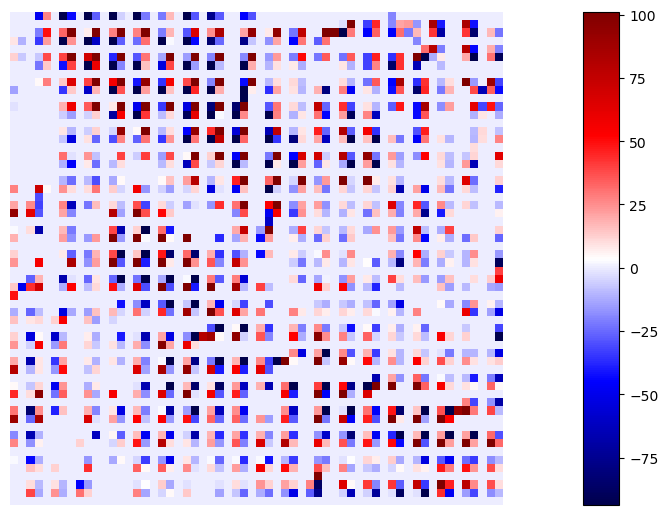

In [ ]:
planform_curvature = rd.TerrainAttribute(rd_array, attrib='planform_curvature', zscale=0.1)
rd.rdShow(center_crop(planform_curvature), axes=False, cmap='seismic', figsize=(8, 5.5))
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


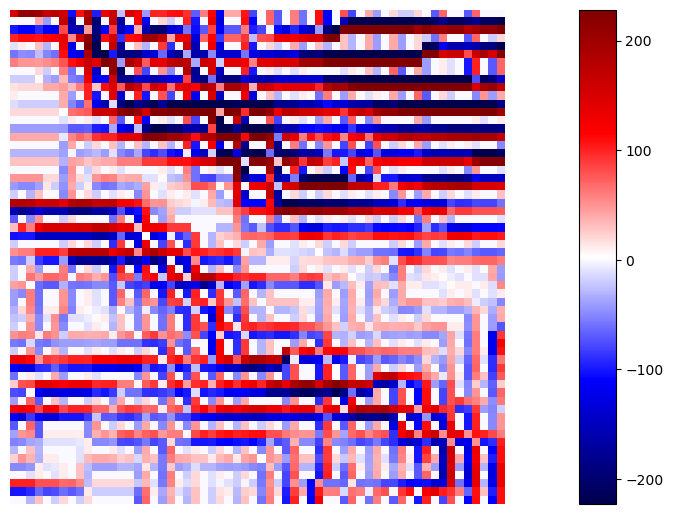

In [ ]:
profile_curvature = rd.TerrainAttribute(rd_array, attrib='profile_curvature', zscale=0.1)
rd.rdShow(center_crop(profile_curvature), axes=False, cmap='seismic', figsize=(8, 5.5))
plt.show()